# Assignment 5

Run each cell in the notebook. The explanation of the cells are given on top respectively. 

In [84]:
import numpy as np
import random
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import sklearn
import sklearn.datasets
import sklearn.linear_model

from data_utils import plot_decision_boundary, load_moons


This is the forward propagation step of the hidden layer. Here W, b and the data is received as input. The operation W.X + b is performed after taking appropriate transpose. The final value is then passed through a ReLU function. Then the activated value is multiplied with a Dropout matrix

In [85]:
def forward_prop_hidden_Drop(W, b, data_X, D, keep_prob):
    intermediate = np.dot(W, data_X)
    Z = intermediate + b
    A = relu(Z)
    A = A*D
    A = A/keep_prob
    return A, Z

This is the forward propagation step of the hidden layer. Here W, b and the data is received as input. The operation W.X + b is performed after taking appropriate transpose. The final value is then passed through a ReLU function

In [86]:
def forward_prop_hidden(W, b, data_X):
    intermediate = np.dot(W, data_X)
    Z = intermediate + b
    A = relu(Z)
    return A, Z

This is the forward propagation step of the output layer. Here W, b and the data is received as input. The operation W.X + b is performed after taking appropriate transpose. The final value is then passed through a sigmoid function to make the value between 0 - 1

In [87]:
def forward_prop_output(W, b, data_X):
    intermediate = np.dot(W, data_X)
    Z = intermediate + b
    A = sigmoid(Z)
    return A


This is the backward propagation step. Here the required derivatives are calculated which will be later updated in further steps. Also the dropout matrix is incorporated and there is a separate function where dropout matrix is not present which will be required for calculating accuracy. The subsequent functions are used for unregularized neural network and neural net with L2 regularization respectively.

In [88]:
def backward_prop_1_Drop(A1, m, W2, dZ2, Z1, data_X, D, keep_prob):
    dA = np.dot(W2.T, dZ2)
    dA = dA*D
    dA = dA/keep_prob
    dZ1 = dA* relu_derivative(Z1)
    dW1 = np.dot(dZ1, data_X.T)/m
    db1 = np.sum(dZ1, axis =1)/m
    db1 = db1.reshape(-1, 1)
    return dW1, db1, dZ1

In [89]:
def backward_prop_1(A1, m, W2, dZ2, Z1, data_X):
    dZ1 = np.dot(W2.T, dZ2) 
    dZ1 = dZ1* relu_derivative(Z1)
    dW1 = np.dot(dZ1, data_X.T)/m
    db1 = np.sum(dZ1, axis =1)/m
    db1 = db1.reshape(-1, 1)
    return dW1, db1, dZ1

In [90]:
def backward_prop_1_L2(A1, m, W2, dZ2, Z1, data_X, lambda1, W1):
    dZ1 = np.dot(W2.T, dZ2) 
    dZ1 = dZ1* relu_derivative(Z1)
    dW1 = (np.dot(dZ1, data_X.T)+lambda1*W1)/m
    db1 = np.sum(dZ1, axis =1)/m
    db1 = db1.reshape(-1, 1)
    return dW1, db1, dZ1

This is the backward propagation of output layer(Layer2)

In [91]:
def backward_prop_2(A2, A1, m, data_Y):
    dZ2 = A2 - data_Y
    dW2 = np.dot(dZ2, A1.T)/m
    db2 = np.sum(dZ2, axis =1)/m
    db2 = db2.reshape(-1, 1)
    return dW2, db2, dZ2

This is the sigmoid activation function used to map any real value between 0 and 1

In [92]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


This is the Rectified Linear Unit(ReLU) activation function

In [93]:
def relu(x):
    return np.maximum(0,x)

This is the derivative of the ReLU function

In [94]:
def relu_derivative(x):
    y = np.array(x > 0)
    y = 1*y
    return y

Computes the cost function for all the training samples

In [95]:
def cost_function(A, m, data_Y):
    total_cost = -(1 / m) * np.sum(data_Y * np.log(A) + (1 - data_Y) * np.log(1 - A))
    return total_cost

This is cost function for L2 regularization

In [96]:
def cost_function_L2(A, m, data_Y, W, lambda1):
    total_cost = -(1 / m) * np.sum(data_Y * np.log(A) + (1 - data_Y) * np.log(1 - A))
    sum1 = 0
    for k in range(l-1):
        sum1 = sum1 + np.sum(np.square(W[k]))
    total_cost = total_cost + sum1*lambda1/(2*m)
    return total_cost

Here the results are predicted. The W and b of model are taken as input. The values are predicted using test dataset and then using the actual values the accuracy is computed

In [97]:
def results(W, b, data_X, data_Y):
    A1 = data_X
    for k in range(l-2):
        A1, Z1 = forward_prop_hidden(W[k], b[k], A1)        
    A2 =  forward_prop_output(W[l-2], b[l-2], A1)   
    pred_Y = A2.transpose()
    
    pred_Y = np.around(pred_Y, decimals = 0)   #Rounding off the predicted value to 0 or 1    
    accuracy = accuracy_score(data_Y.T, pred_Y)   
    return accuracy

This function is used for returning the predicted values which will be used in plotting

In [98]:
def plot(W, b, data_X, data_Y):
    A1 = data_X
    for k in range(l-2):
        A1, Z1 = forward_prop_hidden(W[k], b[k], A1)        
    A2 =  forward_prop_output(W[l-2], b[l-2], A1)   
    pred_Y = A2.transpose()  
    return pred_Y

Plotting the cost function as a function of the iterations. In general we can see that the cost function decreases very fast initially but after a certain number of iterations the rate of decrease is much less which indicates that our neural network is converging hence the error is reducing asymptotically.

In [99]:
def cost_graph(J_arr, cost_arr):
    plt.title('Cost Function Graph')
    plt.xlabel('Epoch')
    plt.ylabel('Cost Function')
    plt.plot(J_arr, cost_arr)
    plt.show()

Here we construct the layout of our neural network. The h array contains the number of hidden units in each layer and the value l indicates the total no of layers. Also we load the training and testing data. The plot is shown of our training and test data.

Training Data


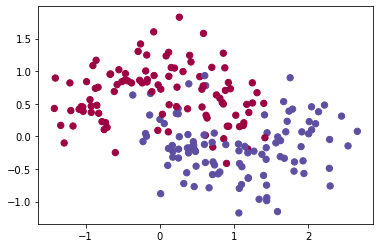


Test Data


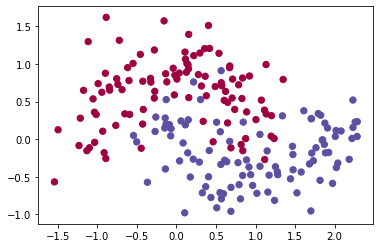

In [105]:
h = [2, 20, 10, 1]     #hidden units
l = 4               #total no of layers
print('Training Data')
train_X, train_Y = load_moons()
train_Y = np.ravel(train_Y)
print('\nTest Data')
test_X, test_Y = load_moons()
test_Y = np.ravel(test_Y)

# Logistic Regression

This is the logistic regression function from scikit-learn provided to us

Accuracy of logistic regression: 86 % (percentage of correctly labelled datapoints)


C:\Users\Bikram Kumar De\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


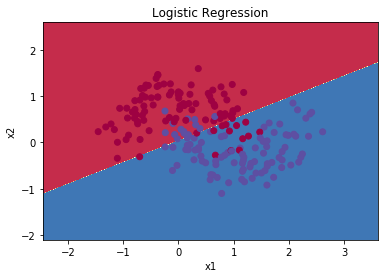

Test accuracy of logistic regression: 85 % (percentage of correctly labelled datapoints)


In [101]:
# Class LogisticRegressionCV implements a logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV();

# Returns 1-d array of shape (m,) 
C = np.ravel(train_Y)

# Fit the model given the training data
clf.fit(train_X.T, C.T)

# Print accuracy
# clf.predict returns labels for examples (of shape (m,n)) in x of shape (m,)
LR_predictions = clf.predict(train_X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(train_Y,LR_predictions) + np.dot(1-train_Y,1-LR_predictions))/float(train_Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

# Plot the decision boundary for logistic regression
plt.title("Logistic Regression")
plot_decision_boundary(lambda x: clf.predict(x), train_X, C)

# Print accuracy on a test set generated using the same distribution

# clf.predict returns labels for examples (of shape (m,n)) in x of shape (m,)
LR_predictions = clf.predict(test_X.T)
print ('Test accuracy of logistic regression: %d ' % float((np.dot(test_Y,LR_predictions) + np.dot(1-test_Y,1-LR_predictions))/float(test_Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

Here we find that the model cannot accurately capture the data. The training and testing accuracy are both low. This is an indication of underfitting.

# Deep Neural Network Unregularized

This is the unregularized neural network from previous assignment. We have hyperparameters of learning rate and we print the training and testing accuracy. Also we plot the decision boundary after training. After that we plot the cost function on basis of number of iterations.


Epoch: 0
Epoch: 2000


C:\Users\Bikram Kumar De\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Users\Bikram Kumar De\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


Epoch: 4000
Epoch: 6000
Epoch: 8000
Epoch: 10000
Epoch: 12000
Epoch: 14000
Epoch: 16000
Epoch: 18000
Epoch: 20000
Epoch: 22000
Epoch: 24000
Epoch: 26000
Epoch: 28000
Epoch: 30000
Epoch: 32000
Epoch: 34000
Epoch: 36000
Epoch: 38000
Epoch: 40000
Epoch: 42000
Epoch: 44000
Epoch: 46000
Epoch: 48000
Epoch: 50000
Training error: 2.5 %
Test error: 12.0 %


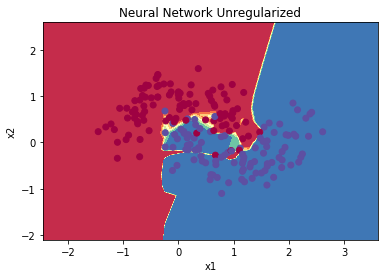

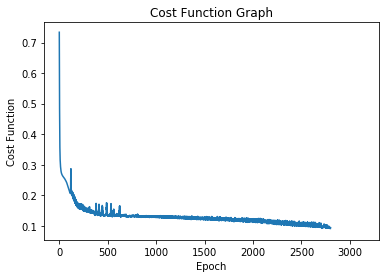

In [102]:
def neural_net():
    n, m = train_X.shape
    alpha = 0.8
    W = [None]*(l-1)
    b = [None]*(l-1)
    A = [None]*(l)
    dW = [None]*(l-1)
    db = [None]*(l-1)
    dZ = [None]*(l-1)
    Z = [None]*(l)
    A[0] = train_X
    cost_array = []
    J_arr =[]
    epochs = 50001
    count = 0
    for k in range(l-1):
        W[k] = np.random.randn(h[k+1],h[k])/np.sqrt(h[k])     #Initializing W and b
        b[k] = np.random.rand(h[k+1], 1)*0.0
    for j in range(epochs):
        if(j%2000 == 0):
            print('Epoch:', j)
        for k in range(l-2):
            A[k+1], Z[k+1] = forward_prop_hidden(W[k], b[k], A[k])         #forward propagation through hidden layer  
        A[l-1] =  forward_prop_output(W[l-2], b[l-2], A[l-2])     #forward propagation through output layer         

        (dW[l-2], db[l-2], dZ[l-2]) = backward_prop_2(A[l-1], A[l-2], m, train_Y)  #backpropagation through output layer
        for k in reversed(range(l-2)):
            (dW[k], db[k], dZ[k]) = backward_prop_1(A[k+1], m, W[k+1], dZ[k+1], Z[k+1], A[k]) #backpropagation through hidden layer

        for k in range(l-1):
            W[k] = W[k] - alpha*dW[k]
            b[k] = b[k] - alpha*db[k]       #Updating b and W

        total_cost = cost_function(A[l-1], m, train_Y)
        cost_array.append(total_cost)    # Storing the value of cost function
        J_arr.append(count)
        count+= 1

    final_accuracy_test = results(W, b, test_X, test_Y)*100    # Calculating the training and test accuracy
    final_accuracy_train = results(W, b, train_X, train_Y)*100
    print('Training error:', str(100-final_accuracy_train),'%')
    print('Test error:', str(100-final_accuracy_test),'%')
    plt.figure()
    plt.title("Neural Network Unregularized")
    plot_decision_boundary(lambda x: plot(W, b, x.T, train_Y), train_X, train_Y.ravel())
    plt.show()
    cost_graph(J_arr, cost_array)
neural_net()

Here we find that there is overfitting in the unregularized network. We can observe the plotted decision boundary. Also we can see that training error is very less while test error is high which indicates that the network has overfitted on training data and does not perform well on test data. Also we find that  the cost function decreases very fast initially but after a certain number of iterations the rate of decrease is much less which indicates that our neural network is converging hence the error is reducing asymptotically.

# Deep Neural Network with L2 Regularization

This is the neural network with L2 regularization. We have hyperparameters of learning rate and lambda and we print the training and testing accuracy. Also we plot the decision boundary after training. After that we plot the cost function on basis of number of iterations.


Epoch: 0
Epoch: 2000
Epoch: 4000
Epoch: 6000
Epoch: 8000
Epoch: 10000
Epoch: 12000
Epoch: 14000
Epoch: 16000
Epoch: 18000
Epoch: 20000
Epoch: 22000
Epoch: 24000
Epoch: 26000
Epoch: 28000
Epoch: 30000
Epoch: 32000
Epoch: 34000
Epoch: 36000
Epoch: 38000
Epoch: 40000
Epoch: 42000
Epoch: 44000
Epoch: 46000
Epoch: 48000
Epoch: 50000
Training error: 8.0 %
Test error: 10.0 %


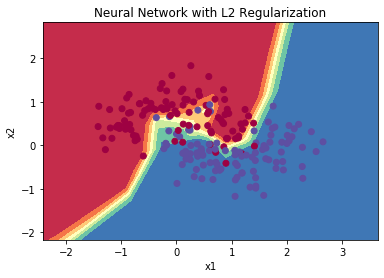

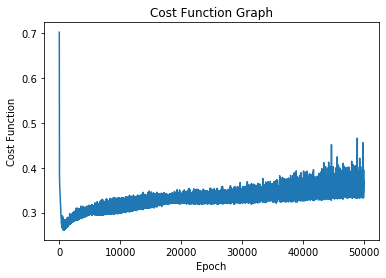

In [107]:
def neural_net_L2():
    n, m = train_X.shape
    lambda1 = 0.6
    alpha = 0.4
    W = [None]*(l-1)
    b = [None]*(l-1)
    A = [None]*(l)
    dW = [None]*(l-1)
    db = [None]*(l-1)
    dZ = [None]*(l-1)
    Z = [None]*(l)
    A[0] = train_X
    cost_array = []
    J_arr =[]
    epochs = 50001
    count = 0
    for k in range(l-1):
        W[k] = np.random.randn(h[k+1],h[k])/np.sqrt(h[k])     #Initializing W and b
        b[k] = np.random.rand(h[k+1], 1)*0.0
    for j in range(epochs):
        if(j%2000 == 0):
            print('Epoch:', j)
        for k in range(l-2):
            A[k+1], Z[k+1] = forward_prop_hidden(W[k], b[k], A[k])         #forward propagation through hidden layer  
        A[l-1] =  forward_prop_output(W[l-2], b[l-2], A[l-2])     #forward propagation through output layer         

        (dW[l-2], db[l-2], dZ[l-2]) = backward_prop_2(A[l-1], A[l-2], m, train_Y)  #backpropagation through output layer
        for k in reversed(range(l-2)):
            (dW[k], db[k], dZ[k]) = backward_prop_1_L2(A[k+1], m, W[k+1], dZ[k+1], Z[k+1], A[k], lambda1, W[k]) #backpropagation through hidden layer
        total_cost = cost_function_L2(A[l-1], m, train_Y, W, lambda1)
        for k in range(l-1):
            W[k] = W[k] - alpha*dW[k]
            b[k] = b[k] - alpha*db[k]       #Updating b and W


        cost_array.append(total_cost)    # Storing the value of cost function
        J_arr.append(count)
        count+= 1    
    final_accuracy_test = results(W, b, test_X, test_Y)*100    # Calculating the training and test accuracy
    final_accuracy_train = results(W, b, train_X, train_Y)*100
    print('Training error:', str(100-final_accuracy_train),'%')
    print('Test error:', str(100-final_accuracy_test),'%')
    plt.figure()
    plt.title('Neural Network with L2 Regularization')
    plot_decision_boundary(lambda x: plot(W, b, x.T, train_Y), train_X, train_Y.ravel())
    plt.show()
    cost_graph(J_arr, cost_array)
neural_net_L2()

Here we find that the overfitting has reduced considerably due to regularization. We also find that increasing the lambda increases the effect of regularization and the cost function reduces as it is seen in the graph. Also it decreases the overfitting effect.
Also depending on the selected dataset the cost function can vary a lot as I tried running the program multiple times.

# Deep Neural Network with Dropout

Here the neural network is implemented using dropout. It is basically same as that of the previous network except that we have a droput matrix which we use in hidden layers during forward and back propagation. The keep probability is kept as a parameter.
Also at the end, I have printed the decision boundary using the function given to us. Also the cost function for the iterations is plotted

Epoch: 0


C:\Users\Bikram Kumar De\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Users\Bikram Kumar De\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


Epoch: 2000
Epoch: 4000
Epoch: 6000
Epoch: 8000
Epoch: 10000
Epoch: 12000
Epoch: 14000
Epoch: 16000
Epoch: 18000
Epoch: 20000
Epoch: 22000
Epoch: 24000
Epoch: 26000
Epoch: 28000
Epoch: 30000
Epoch: 32000
Epoch: 34000
Epoch: 36000
Epoch: 38000
Epoch: 40000
Epoch: 42000
Epoch: 44000
Epoch: 46000
Epoch: 48000
Epoch: 50000
Training error: 4.0 %
Test error: 12.0 %


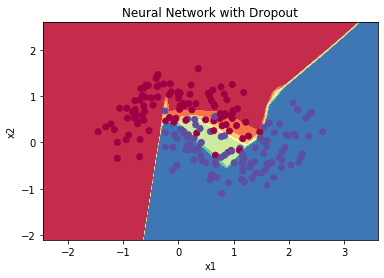

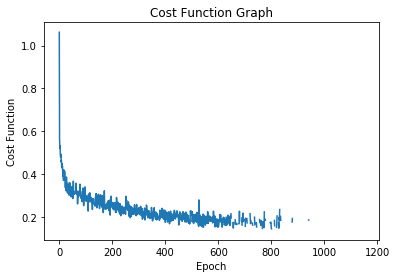

In [104]:
def neural_net_drop():
    n, m = train_X.shape
    alpha = 0.5
    W = [None]*(l-1)
    b = [None]*(l-1)
    A = [None]*(l)
    D = [None]*(l-2)
    dW = [None]*(l-1)
    db = [None]*(l-1)
    dZ = [None]*(l-1)
    Z = [None]*(l)
    A[0] = train_X
    keep_prob = 0.5
    cost_array = []
    J_arr =[]
    epochs = 50001
    count = 0
    for k in range(l-1):
        W[k] = np.random.randn(h[k+1],h[k])/np.sqrt(h[k])     #Initializing W and b
        b[k] = np.random.rand(h[k+1], 1)*0
    for j in range(epochs):
        if(j%2000 == 0):
            print('Epoch:', j)
        for k in range(l-2):
            D[k] = np.random.randn(h[k+1], m)
            D[k] = D[k]<keep_prob
        for k in range(l-2):
            A[k+1], Z[k+1] = forward_prop_hidden_Drop(W[k], b[k], A[k], D[k], keep_prob)         #forward propagation through hidden layer
        A[l-1] =  forward_prop_output(W[l-2], b[l-2], A[l-2])     #forward propagation through output layer         

        (dW[l-2], db[l-2], dZ[l-2]) = backward_prop_2(A[l-1], A[l-2], m, train_Y)  #backpropagation through output layer
        for k in reversed(range(l-2)):
            (dW[k], db[k], dZ[k]) = backward_prop_1_Drop(A[k+1], m, W[k+1], dZ[k+1], Z[k+1], A[k], D[k], keep_prob) #backpropagation through hidden layer

        for k in range(l-1):
            W[k] = W[k] - alpha*dW[k]
            b[k] = b[k] - alpha*db[k]       #Updating b and W

        total_cost = cost_function(A[l-1], m, train_Y)
        cost_array.append(total_cost)    # Storing the value of cost function
        J_arr.append(count)
        count+= 1

    final_accuracy_test = results(W, b, test_X, test_Y)*100    # Calculating the training and test accuracy
    final_accuracy_train = results(W, b, train_X, train_Y)*100
    print('Training error:', str(100-final_accuracy_train),'%')
    print('Test error:', str(100-final_accuracy_test),'%')
    plt.figure()
    plt.title("Neural Network with Dropout")
    plot_decision_boundary(lambda x: plot(W, b, x.T, train_Y), train_X, train_Y.ravel())
    plt.show()
    cost_graph(J_arr, cost_array)
neural_net_drop()

The model is overfitting which can be viewed by noticing the decision boundary. Also, the training error is significantly less which verifies the above fact.
Also increasing the keep probability too much (0.9) increases the training accuracy and increases overfitting. Having the keep probability of 0.5 shows considerable good results
Decreasing the keep probability too much (0.1) also provides poor results.
Also since nodes get switched on and off the cost function fluctuates a lot.